In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Entrenamiento
from sklearn.model_selection import train_test_split

# Modelado
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Normalizacion
from sklearn.preprocessing import StandardScaler

# Metricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Guardar mmodelo
import joblib

In [94]:
data = 'customer_churn_dataset.csv'

## Información de los datos

In [95]:
df = pd.read_csv(data)
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


- **CustomerID:** Código de identificación del cliente
- **Age:** Edad del cliente (en años)
- **Gender:** Género del cliente (Masculino/Femenino)
- **Tenure:** El período de tiempo que el cliente utiliza el servicio (en meses)
- **Usage Frequency:** La frecuencia con la que el cliente utiliza el servicio (en meses)
- **Support Calls:** Frecuencia de llamadas del cliente al servicio de atención
- **Payment Delay:** El período de retraso en el pago de las facturas del servicio por parte de los clientes (en meses)
- **Subscription Type:** El tipo de servicio seleccionado por el cliente (Básico/Estándar/Premium)
- **Contract Length:** El período de contrato del servicio seleccionado por el cliente (Mensual/Trimestral/Anual)
- **Total Spend:** Dinero total gastado por el cliente en el servicio (en USD)
- **Last Interaction:** El período de tiempo desde el último uso del cliente hasta el presente (en meses)
- **Churn:** El estado actual del cliente, continúa con el servicio (0) o lo abandona (1)

## Preprocesamiento de datos

In [96]:
# Permite conocer las dimensiones del DataFrame
df.shape

(64374, 12)

In [97]:
# Para ver la información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [98]:
# Verificar si hay duplicados
df.duplicated().sum()

np.int64(0)

In [99]:
# Verificar si hay datos faltantes
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [100]:
# CustomerID es solo un identificador, no aporta información predictiva
df = df.drop('CustomerID', axis=1)

In [101]:
# Lista de las columnas
df.columns.tolist()

['Age',
 'Gender',
 'Tenure',
 'Usage Frequency',
 'Support Calls',
 'Payment Delay',
 'Subscription Type',
 'Contract Length',
 'Total Spend',
 'Last Interaction',
 'Churn']

In [102]:
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [103]:
# Imprimiendo los valores únicos en todas las columnas menos las numericas.

caracteristicas_numericas = ['Age',
 'Tenure',
 'Usage Frequency',
 'Support Calls',
 'Payment Delay',
 'Total Spend',
 'Last Interaction', 
 'Churn']

for col in df.columns:
    if col not in caracteristicas_numericas:
        print(col, df[col].unique())
        print("-" * 70)

Gender ['Female' 'Male']
----------------------------------------------------------------------
Subscription Type ['Basic' 'Standard' 'Premium']
----------------------------------------------------------------------
Contract Length ['Monthly' 'Annual' 'Quarterly']
----------------------------------------------------------------------


## EDA (Análisis Exploratorio de Datos)

In [104]:
# Informacion de los datos numericos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,64374.0,41.970982,13.924911,18.0,30.0,42.0,54.0,65.0
Tenure,64374.0,31.994827,17.098234,1.0,18.0,33.0,47.0,60.0
Usage Frequency,64374.0,15.080234,8.816470,1.0,7.0,15.0,23.0,30.0
Support Calls,64374.0,5.400690,3.114005,0.0,3.0,6.0,8.0,10.0
Payment Delay,64374.0,17.133952,8.852211,0.0,10.0,19.0,25.0,30.0
Total Spend,64374.0,541.023379,260.874809,100.0,313.0,534.0,768.0,1000.0
Last Interaction,64374.0,15.498850,8.638436,1.0,8.0,15.0,23.0,30.0
Churn,64374.0,0.473685,0.499311,0.0,0.0,0.0,1.0,1.0


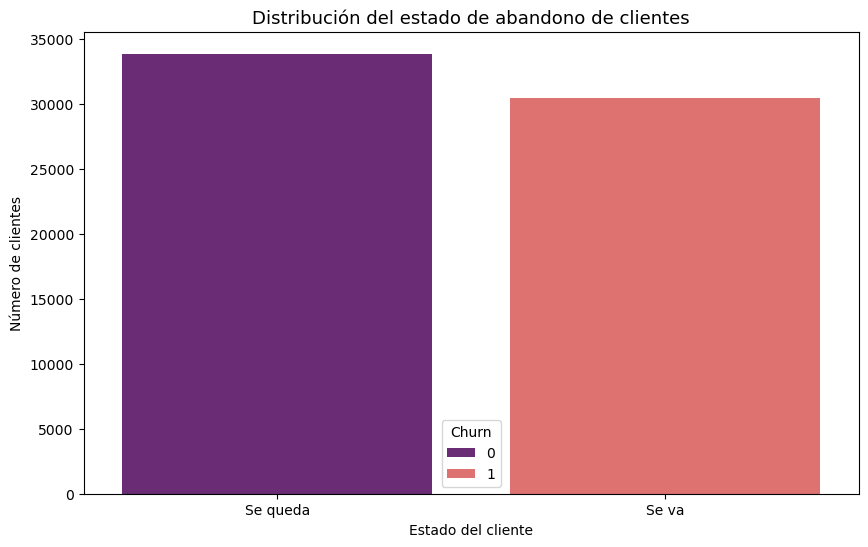

Distribución porcentual de Churn:
Churn
Se queda    52.631497
Se va       47.368503
Name: proportion, dtype: float64


In [105]:
# Información del estado actual del cliente
plt.figure(figsize=(10, 6))

ax = sns.countplot(x='Churn',data=df, hue= 'Churn',palette='magma')

ax.set_title('Distribución del estado de abandono de clientes', fontsize=13)
ax.set_xlabel('Estado del cliente')
ax.set_ylabel('Número de clientes')

# Definir ticks y etiquetas
ax.set_xticks([0, 1])
ax.set_xticklabels(['Se queda', 'Se va'])

plt.show()

churn_pct = df['Churn'].value_counts(normalize=True) * 100
print('Distribución porcentual de Churn:')
print(churn_pct.rename({0: 'Se queda', 1: 'Se va'}))

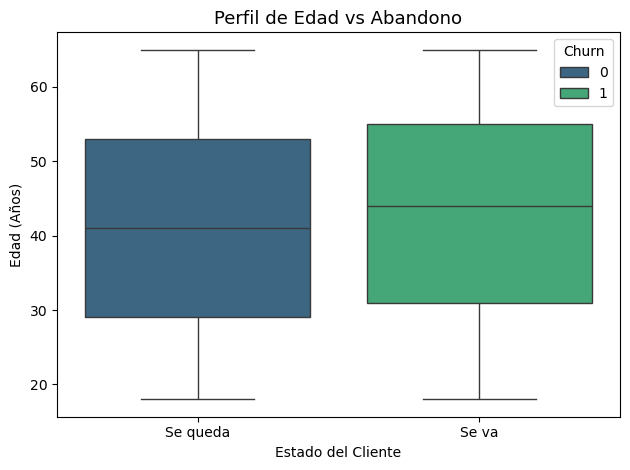

In [106]:
# Información del estado actual del clienteplt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x='Churn', hue= 'Churn',y='Age', palette='viridis')

ax.set_title('Perfil de Edad vs Abandono', fontsize=13)
ax.set_xlabel('Estado del Cliente')
ax.set_ylabel('Edad (Años)')

# Definir ticks y etiquetas
ax.set_xticks([0, 1])
ax.set_xticklabels(['Se queda', 'Se va'])

plt.tight_layout()
plt.show()

El análisis muestra que los clientes que abandonan el servicio presentan una mediana de edad ligeramente superior a la de los clientes retenidos. Sin embargo, existe un alto solapamiento entre ambos grupos, lo que sugiere que la edad, aunque relevante, no es un factor determinante único del abandono.

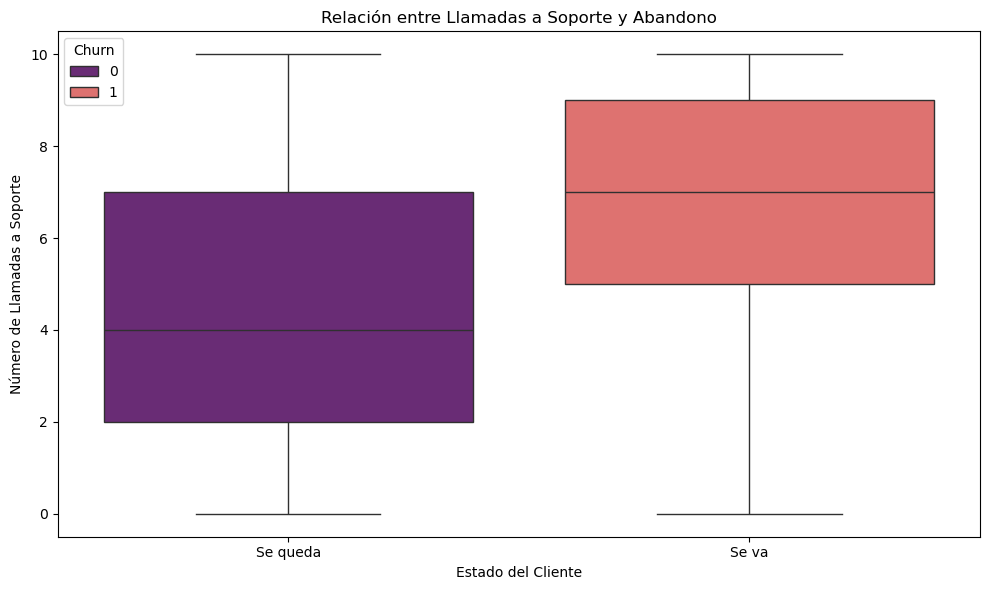

In [107]:
# Número de llamadas a soporte según el estado del cliente
plt.figure(figsize=(10, 6))

ax = sns.boxplot(data=df, x='Churn', hue= 'Churn',y='Support Calls', palette='magma')
plt.title('Relación entre Llamadas a Soporte y Abandono')
ax.set_xlabel('Estado del Cliente')
ax.set_ylabel('Número de Llamadas a Soporte')

# Definir ticks y etiquetas
ax.set_xticks([0, 1])
ax.set_xticklabels(['Se queda', 'Se va'])

plt.tight_layout()
plt.show()

Los clientes que abandonan el servicio presentan un número significativamente mayor de llamadas a soporte en comparación con los clientes retenidos. Esto sugiere que una mayor interacción con el área de soporte, posiblemente debido a problemas recurrentes o insatisfacción, está asociada con una mayor probabilidad de abandono.

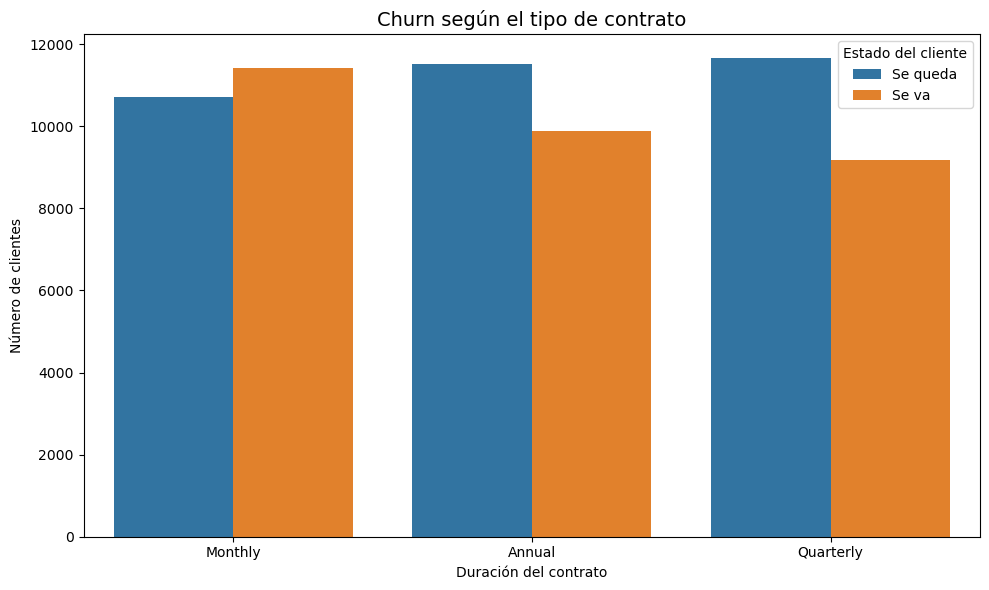

In [108]:
# Tipos de contratos y permanencia
plt.figure(figsize=(10, 6))

ax = sns.countplot(x='Contract Length',hue='Churn',data=df)

ax.set_title('Churn según el tipo de contrato', fontsize=14)
ax.set_xlabel('Duración del contrato')
ax.set_ylabel('Número de clientes')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,['Se queda', 'Se va'],title='Estado del cliente')

plt.tight_layout()
plt.show()

Como se observa en la gráfica, los contratos Mensuales (Monthly) tienen una proporción de fuga mucho mayor que los Anuales o Trimestrales. De hecho, en el contrato mensual, hay más personas que se van a las que permanecen

## Modelado Random Forest

In [109]:
df_encoded_rf = df.copy()

In [110]:
df_encoded_rf .head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [111]:
df_encoded_rf .columns.tolist()

['Age',
 'Gender',
 'Tenure',
 'Usage Frequency',
 'Support Calls',
 'Payment Delay',
 'Subscription Type',
 'Contract Length',
 'Total Spend',
 'Last Interaction',
 'Churn']

In [112]:
df_encoded_rf ['Gender'] = df_encoded_rf ['Gender'].apply (lambda x: 1 if x == 'Female' else 0)
df_encoded_rf .head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,1,25,14,4,27,Basic,Monthly,598,9,1
1,41,1,28,28,7,13,Standard,Monthly,584,20,0
2,47,0,27,10,2,29,Premium,Annual,757,21,0
3,35,0,9,12,5,17,Premium,Quarterly,232,18,0
4,53,1,58,24,9,2,Standard,Annual,533,18,0


In [113]:
mapping_ST = {
    "Basic": 0,
    "Standard": 1,
    "Premium": 2
}

df_encoded_rf ['Subscription Type'] = df_encoded_rf ['Subscription Type'].map(mapping_ST)
df_encoded_rf.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,1,25,14,4,27,0,Monthly,598,9,1
1,41,1,28,28,7,13,1,Monthly,584,20,0
2,47,0,27,10,2,29,2,Annual,757,21,0
3,35,0,9,12,5,17,2,Quarterly,232,18,0
4,53,1,58,24,9,2,1,Annual,533,18,0


In [114]:
mapping_CL = {
    "Monthly": 0,
    "Quarterly": 1,
    "Annual": 2
}

df_encoded_rf ['Contract Length'] = df_encoded_rf ['Contract Length'].map(mapping_CL)
df_encoded_rf .head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,1,25,14,4,27,0,0,598,9,1
1,41,1,28,28,7,13,1,0,584,20,0
2,47,0,27,10,2,29,2,2,757,21,0
3,35,0,9,12,5,17,2,1,232,18,0
4,53,1,58,24,9,2,1,2,533,18,0


Nota para el encoding:

* Arbol de decision: Ordinal encoding para Subscription Type y Contract Length

* Regresion logistica: one hot encoding para Subscription Type y Contract Length

In [115]:
# Definir variables
# Variable independientes
X = df_encoded_rf.drop('Churn', axis= 1)
X

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,22,1,25,14,4,27,0,0,598,9
1,41,1,28,28,7,13,1,0,584,20
2,47,0,27,10,2,29,2,2,757,21
3,35,0,9,12,5,17,2,1,232,18
4,53,1,58,24,9,2,1,2,533,18
...,...,...,...,...,...,...,...,...,...,...
64369,45,1,33,12,6,21,0,1,947,14
64370,37,0,6,1,5,22,1,2,923,9
64371,25,0,39,14,8,30,2,0,327,20
64372,50,1,18,19,7,22,1,0,540,13


In [116]:
# Variable dependiente, la que queremos descubrir
y = df_encoded_rf['Churn']
y

0        1
1        0
2        0
3        0
4        0
        ..
64369    1
64370    1
64371    1
64372    1
64373    1
Name: Churn, Length: 64374, dtype: int64

In [117]:
# Crear grupo de entrenamieto y grupo de prueba
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X, y,
                                                           train_size= 0.7, # 70 de entrenamiento y 30 de prueba
                                                           random_state= 42)

In [118]:
# Algoritmo de bosque aleatorio
rf = RandomForestClassifier(random_state= 42)
rf.fit(X_entrena, y_entrena)

RandomForestClassifier(random_state=42)

In [119]:
y_pred_rf = rf.predict(X_prueba)

In [120]:
print("Accuracy:", accuracy_score(y_prueba, y_pred_rf))
print("Precision:", precision_score(y_prueba, y_pred_rf))
print("Recall:", recall_score(y_prueba, y_pred_rf))
print("F1 Score:", f1_score(y_prueba, y_pred_rf))

Accuracy: 0.9991715424843369
Precision: 0.9993460490463215
Recall: 0.9989105567055234
F1 Score: 0.9991282554211616


## Modelado Logistic Regresion

In [121]:
df_encoded_lr = df.copy()

In [122]:
df_encoded_lr.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [123]:
df_encoded_lr .columns.tolist()

['Age',
 'Gender',
 'Tenure',
 'Usage Frequency',
 'Support Calls',
 'Payment Delay',
 'Subscription Type',
 'Contract Length',
 'Total Spend',
 'Last Interaction',
 'Churn']

In [124]:
df_encoded_lr ['Gender'] = df_encoded_rf ['Gender'].apply (lambda x: 1 if x == 'Female' else 0)
df_encoded_lr .head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,0,25,14,4,27,Basic,Monthly,598,9,1
1,41,0,28,28,7,13,Standard,Monthly,584,20,0
2,47,0,27,10,2,29,Premium,Annual,757,21,0
3,35,0,9,12,5,17,Premium,Quarterly,232,18,0
4,53,0,58,24,9,2,Standard,Annual,533,18,0


In [125]:
df_encoded_lr = pd.get_dummies(df_encoded_lr, columns=["Subscription Type"])
df_encoded_lr

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Contract Length,Total Spend,Last Interaction,Churn,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard
0,22,0,25,14,4,27,Monthly,598,9,1,True,False,False
1,41,0,28,28,7,13,Monthly,584,20,0,False,False,True
2,47,0,27,10,2,29,Annual,757,21,0,False,True,False
3,35,0,9,12,5,17,Quarterly,232,18,0,False,True,False
4,53,0,58,24,9,2,Annual,533,18,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64369,45,0,33,12,6,21,Quarterly,947,14,1,True,False,False
64370,37,0,6,1,5,22,Annual,923,9,1,False,False,True
64371,25,0,39,14,8,30,Monthly,327,20,1,False,True,False
64372,50,0,18,19,7,22,Monthly,540,13,1,False,False,True


In [126]:
df_encoded_lr = pd.get_dummies(df_encoded_lr, columns=["Contract Length"])
df_encoded_lr

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,22,0,25,14,4,27,598,9,1,True,False,False,False,True,False
1,41,0,28,28,7,13,584,20,0,False,False,True,False,True,False
2,47,0,27,10,2,29,757,21,0,False,True,False,True,False,False
3,35,0,9,12,5,17,232,18,0,False,True,False,False,False,True
4,53,0,58,24,9,2,533,18,0,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64369,45,0,33,12,6,21,947,14,1,True,False,False,False,False,True
64370,37,0,6,1,5,22,923,9,1,False,False,True,True,False,False
64371,25,0,39,14,8,30,327,20,1,False,True,False,False,True,False
64372,50,0,18,19,7,22,540,13,1,False,False,True,False,True,False


In [127]:
# Definir variables
# Variable independientes
X = df_encoded_lr.drop('Churn', axis= 1)

In [128]:
# Variable dependiente, la que queremos descubrir
y = df_encoded_lr['Churn']

In [129]:
# Crear grupo de entrenamieto y grupo de prueba
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X, y,
                                                           train_size= 0.7, # 70 de entrenamiento y 30 de prueba
                                                           random_state= 42)

In [130]:
scaler = StandardScaler()
X_entrena = scaler.fit_transform(X_entrena)
X_prueba = scaler.transform(X_prueba)

In [131]:
# Build and train the logistic Regresion model
lr = LogisticRegression(random_state= 42)
lr.fit(X_entrena, y_entrena)

LogisticRegression(random_state=42)

In [133]:
# Make predictions
y_pred_lr = lr.predict(X_prueba)

In [135]:
print("Accuracy:", accuracy_score(y_prueba, y_pred_lr))
print("Precision:", precision_score(y_prueba, y_pred_lr))
print("Recall:", recall_score(y_prueba, y_pred_lr))
print("F1 Score:", f1_score(y_prueba, y_pred_lr))

Accuracy: 0.8187749184487133
Precision: 0.8052897537899151
Recall: 0.8159930275629154
F1 Score: 0.8106060606060606


## Guardar modelo

In [137]:
joblib.dump(rf, 'random_forest.pkl')

['random_forest.pkl']